# Instacart Purchase Data Analysis: Understanding Consumer Behavior and Strategic Improvement Opportunities


## **Introduction**
Instacart is an online grocery delivery platform that allows users to place orders online and have them delivered to their homes, similar to Uber Eats and Door Dash. The goal of this project is to analyze these data and gain insights to understand customer behavior.

## **Project Objectives**

The purpose of this project is to perform a comprehensive analysis of Instacart order data to obtain key insights into user shopping habits and the characteristics of the most requested products. The specific objectives are as follows:

- **Explore and understand the data structure:** Perform an initial analysis to identify the elements present in the data, their characteristics, and potential issues, such as missing or duplicate values.
- **Data cleaning and preprocessing:** Detect and correct issues in the data, ensuring that it is ready for subsequent analysis by imputing missing values and removing duplicates.
- **Exploratory data analysis:**
  - Identify shopping patterns by time of day and day of the week.
  - Analyze order frequency and the time users wait between one order and the next.
  - Determine which products are most purchased and which products users tend to repurchase.
  - Explore how orders are distributed in terms of the number of items and user preferences when adding products to the cart.
- **Provide data-driven recommendations:** Use the analysis results to propose actions that could improve the customer experience and optimize Instacart's operations, such as adjustments in inventory management and the personalization of offers and promotions.

##  **Loading Data**

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Function to load and display a DataFrame

def cargar_y_mostrar_info(nombre_archivo, sep=';', num_filas=5):
    df = pd.read_csv(nombre_archivo, sep=sep)
    df.info()
    display(df.head(num_filas))
    return df

# Load the datasets
instacart_orders_df = cargar_y_mostrar_info('/datasets/instacart_orders.csv')
products_df = cargar_y_mostrar_info('/datasets/products.csv')
aisles_df = cargar_y_mostrar_info('/datasets/aisles.csv')
departments_df = cargar_y_mostrar_info('/datasets/departments.csv')
order_products_df = cargar_y_mostrar_info('/datasets/order_products.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [2]:
# Display descriptive statistics
print("Descripción del DataFrame 'instacart_orders_df':")
print(instacart_orders_df.describe())

print("Descripción del DataFrame 'order_products_df':")
print(order_products_df.describe())

Descripción del DataFrame 'instacart_orders_df':
           order_id        user_id   order_number      order_dow  \
count  4.789670e+05  478967.000000  478967.000000  478967.000000   
mean   1.709947e+06  102966.537475      17.157808       2.775058   
std    9.869480e+05   59525.328991      17.704688       2.045869   
min    4.000000e+00       2.000000       1.000000       0.000000   
25%    8.564685e+05   51414.000000       5.000000       1.000000   
50%    1.709522e+06  102633.000000      11.000000       3.000000   
75%    2.562990e+06  154419.000000      23.000000       5.000000   
max    3.421079e+06  206209.000000     100.000000       6.000000   

       order_hour_of_day  days_since_prior_order  
count      478967.000000           450148.000000  
mean           13.446676               11.101751  
std             4.224986                9.189975  
min             0.000000                0.000000  
25%            10.000000                4.000000  
50%            13.000000        

# Step 2. Data Preprocessing

## **Preparing Data**

### **Detecting Duplicates**

#### instacart_orders_df

In [3]:
# Check for duplicate orders
print(instacart_orders_df['order_id'].value_counts())

2125197    2
1782114    2
1286742    2
391768     2
1021560    2
          ..
1273706    1
689148     1
1752059    1
2794488    1
2047       1
Name: order_id, Length: 478952, dtype: int64


In [4]:
# Check all orders placed on Wednesday at 2:00 a.m.
miercoles_orders_2am = instacart_orders_df[(instacart_orders_df['order_dow'] == 3) & 
                                    (instacart_orders_df['order_hour_of_day'] == 2)]
print(miercoles_orders_2am)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

In [5]:
# Remove duplicate orders
instacart_orders_df = instacart_orders_df.drop_duplicates(subset='order_id')

# Recheck for duplicate rows
duplicates = instacart_orders_df[instacart_orders_df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [6]:
# Recheck only for duplicate order IDs
print(instacart_orders_df['order_id'].value_counts())

1048576    1
3389216    1
1100604    1
1275704    1
2337103    1
          ..
1752059    1
2794488    1
711671     1
1711087    1
2047       1
Name: order_id, Length: 478952, dtype: int64


#### products_df

In [7]:
# Check if there are any fully duplicated rows
print(products_df[products_df.duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [8]:
# Check if there are duplicate department IDs
print(products_df['department_id'].value_counts())

11    6564
19    6264
13    5372
7     4366
1     4008
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1117
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: department_id, dtype: int64


In [9]:
# Check if there are duplicate product names (converted to uppercase)
products_df['product_name_upper'] = products_df['product_name'].str.upper()
duplicated_products = products_df[products_df['product_name_upper'].duplicated()]
print(products_df['product_name_upper'].value_counts())

GREEN TEA WITH GINSENG AND HONEY                                 3
VITAMIN D3 2000 IU                                               2
HYDRO BODY SPONGE WITH HAND STRAP                                2
PINEAPPLE SLICES IN HEAVY SYRUP                                  2
CONCENTRACE TRACE MINERAL DROPS                                  2
                                                                ..
MALLOW BITS VANILLA MARSHMALLOWS                                 1
ORGANIC STRAWBERRY PRESERVES                                     1
GREEN LENTIL ROTINI WITH GARLIC HERB SAUCE                       1
ORGANIC MINT CHEWS                                               1
PROTEIN KEFIR NONFAT CULTURED MILK SMOOTHIE VANILLA PROBIOTIC    1
Name: product_name_upper, Length: 48332, dtype: int64


In [10]:
# Check if there are duplicate non-missing product names
duplicated_products = products_df[products_df['product_name_upper'].duplicated()]
print(duplicated_products['product_name_upper'].value_counts())

GREEN TEA WITH GINSENG AND HONEY           2
OIL OF OREGANO DIETARY SUPPLEMENT          1
CREAM OF MUSHROOM SOUP                     1
FIRE ROASTED DICED TOMATOES WITH GARLIC    1
SALSA MEDIUM                               1
                                          ..
EDAMAME SOYBEANS IN PODS                   1
PROTEIN PLUS VANILLA BEAN PROTEIN SHAKE    1
AMERICAN CHEESE SLICES                     1
TOP THE TATER CHIVE & ONION SOUR CREAM     1
BBQ SAUCE                                  1
Name: product_name_upper, Length: 103, dtype: int64


#### departments_df

In [11]:
# Check if there are any fully duplicated rows
print(departments_df[departments_df.duplicated()])

Empty DataFrame
Columns: [department_id, department]
Index: []


In [12]:
# Check if there are duplicate product IDs
print(departments_df['department_id'].value_counts())

1     1
12    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
11    1
2     1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
21    1
Name: department_id, dtype: int64


#### aisles_df

In [13]:
# Check if there are any fully duplicated rows
print(aisles_df[aisles_df.duplicated()])

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [14]:
# Check if there are duplicate aisle IDs
print(aisles_df['aisle_id'].value_counts())

1      1
85     1
99     1
98     1
97     1
      ..
40     1
39     1
38     1
37     1
134    1
Name: aisle_id, Length: 134, dtype: int64


#### order_products_df

In [15]:
# Check if there are any fully duplicated rows
print(order_products_df[order_products_df.duplicated()])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [16]:
# Recheck if there are any other tricky duplicates
duplicated_rows = order_products_df[order_products_df.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


#### **Findings**

1. **`instacart_orders_df`**:
   - **Findings**: Several duplicate rows were found based on the `order_id` column. After removing these duplicates, orders placed on Wednesday at 2:00 a.m. showed an interesting pattern, with 121 orders made at that time.
   - **Actions**: Duplicates in `order_id` were removed, and it was verified that all order IDs are unique.


2. **`products_df`**:
   - **Findings**: No fully duplicated rows were found. However, duplicates were detected in product names when converted to uppercase. Some products, like "GREEN TEA WITH GINSENG AND HONEY," appeared multiple times.
   - **Actions**: The duplicated products were identified for further analysis.


3. **`departments_df`**:
   - **Findings**: No duplicate rows or duplicate department IDs were found. All departments have a unique ID.
   - **Actions**: No further action was required for this DataFrame.


4. **`aisles_df`**:
   - **Findings**: No duplicate rows or duplicate aisle IDs were found. All aisles have a unique ID.
   - **Actions**: No further action was required for this DataFrame.


5. **`order_products_df`**:
   - **Findings**: No fully duplicated rows or tricky duplicates were found in this DataFrame.
   - **Actions**: No further action was necessary.

#### **Conclusions**


Significant duplicates were removed from the orders DataFrame, which improved data quality. 
In the products, departments, aisles, and order products DataFrames, no relevant duplicates were found that required further intervention.

### **Missing Values Detection and Handling**


#### products_df

In [17]:
# Find missing values in the 'product_name' column
print(products_df['product_name'].value_counts(dropna=False))

NaN                                                                                       1258
Cheese Stuffed Shells                                                                        1
Beneful Healthy Fiesta with Real Chicken Dog Food                                            1
Xtra Protection Always Xtra Protection Daily Liners- Extra Long 34 Count Feminine Care       1
Gala (3 Lb)                                                                                  1
                                                                                          ... 
Chicken & Vegetable Potstickers                                                              1
Cocoa Krispies Cereal                                                                        1
Hemp Seed- Hulled                                                                            1
Free & Clear Diapers                                                                         1
Organic Red Raspberries                           

In [18]:
# Filter products with missing 'product_name' values and aisle ID 100
missing_product_names = products_df[(products_df['product_name'].isna()) & (products_df['aisle_id'] == 100)]
print(missing_product_names)

       product_id product_name  aisle_id  department_id product_name_upper
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]


In [19]:
# Filter products with missing 'product_name' values and department ID 21
missing_product_names_dept_21 = products_df[(products_df['product_name'].isna()) & (products_df['department_id'] == 21)]
print(missing_product_names_dept_21)

       product_id product_name  aisle_id  department_id product_name_upper
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]


In [20]:
# Use the department and aisle tables to check data for aisle ID 100 and department ID 21
aisle_100 = aisles_df[aisles_df['aisle_id'] == 100]
department_21 = departments_df[departments_df['department_id'] == 21]
print("Pasillo con ID 100:")
print(aisle_100)
print("\nDepartamento con ID 21:")
print(department_21)

Pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Departamento con ID 21:
    department_id department
20             21    missing


In [21]:
# Fill missing product names with 'Unknown'
products_df['product_name'].fillna('Unknown', inplace=True)

#### instacart_orders_df

In [22]:
# Find missing values
missing_values_orders = instacart_orders_df.isnull().sum()
print(missing_values_orders)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [23]:
# Check if the missing values in 'days_since_prior_order' are not from the first order
print(missing_values_orders['days_since_prior_order'] > 0)

True


#### order_products_df

In [24]:
# Find missing values
missing_values_order_products = order_products_df.isnull().sum()
print(missing_values_order_products)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [25]:
# Check the range of 'add_to_cart_order' to identify extreme values
print(order_products_df['add_to_cart_order'].min(), order_products_df['add_to_cart_order'].max())

1.0 64.0


In [26]:
# Fill missing values in 'add_to_cart_order' with 999
order_products_df['add_to_cart_order'].fillna(999, inplace=True)

In [27]:
# Ensure 'add_to_cart_order' values are numeric
order_products_df['add_to_cart_order'] = pd.to_numeric(order_products_df['add_to_cart_order'], errors='coerce').fillna(999).astype(int)

#### **Findings**

1. **`products_df`**:
   - **Findings**: There were 1,258 missing values in the `product_name` column. These missing values were associated with aisle ID 100 and department ID 21, both labeled as 'missing'.
   - **Actions**: The missing values in the `product_name` column were filled with 'Unknown' to ensure that all products have an assigned name and to avoid issues during data analysis.

2. **`instacart_orders_df`**:
   - **Findings**: The `days_since_prior_order` column had 28,817 missing values, suggesting that these orders might be the customers' first, as there was no previous order from which to calculate the days passed.
   - **Actions**: No modifications were made to these values, as this is an expected behavior (customer's first order).

3. **`order_products_df`**:
   - **Findings**: The `add_to_cart_order` column had 836 missing values. These were not necessarily related to large orders (over 64 products), as the minimum number of products in the affected orders was less than that value.
   - **Actions**: The missing values in `add_to_cart_order` were filled with 999 to ensure consistency in the analysis. It was ensured that the column contained numeric values in all rows.

#### **Conclusions**
- Missing values in `product_name` were filled with 'Unknown' to avoid issues in the analysis.
- Missing values in `days_since_prior_order` were left unchanged, as they reflect expected behavior for a customer's first order.
- In `order_products_df`, missing values in `add_to_cart_order` were filled with 999, and data consistency was ensured by converting them into numeric values.


## **Data Analysis**

### **Verification of Values in Hours and Days of the Week**

In [28]:
# Verificar los valores mínimos y máximos en las columnas 'order_hour_of_day' y 'order_dow'del DataFrame 'instacart_orders_df'. 
min_hour = instacart_orders_df['order_hour_of_day'].min()
max_hour = instacart_orders_df['order_hour_of_day'].max()
min_dow = instacart_orders_df['order_dow'].min()
max_dow = instacart_orders_df['order_dow'].max()

print("Valores en 'order_hour_of_day': Min =", min_hour, ", Max =", max_hour)
print("Valores en 'order_dow': Min =", min_dow, ", Max =", max_dow)

Valores en 'order_hour_of_day': Min = 0 , Max = 23
Valores en 'order_dow': Min = 0 , Max = 6


#### Findings

The values in the `order_hour_of_day` and `order_dow` columns were verified to be reasonable.

- `order_hour_of_day`: Values range from 0 to 23.
- `order_dow`: Values range from 0 to 6.

The data is consistent and does not present any outliers.


### **Order Distribution by Hour of the Day**

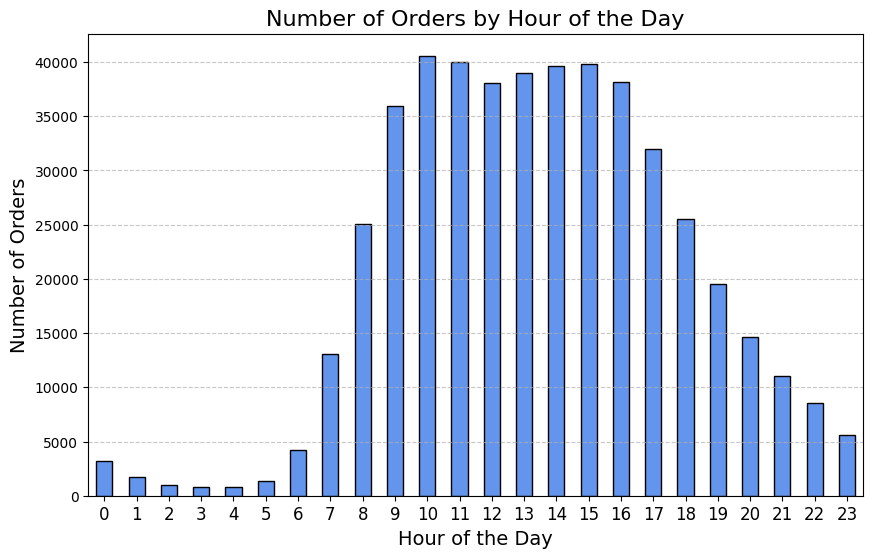

In [40]:
# Order Distribution by Hour of the Day
plt.figure(figsize=(10, 6))
bars = instacart_orders_df['order_hour_of_day'].value_counts().sort_index().plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Number of Orders by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Findings

The chart shows the number of people placing orders by the hour of the day. The following observations can be made:

- `Peak activity between 10 a.m. and 3 p.m.`: Most orders are placed within this time range, with a peak around 10 a.m. This suggests that many users prefer to place their orders in the morning or early afternoon, possibly before starting other daily activities or at the beginning of their workday.

- `Gradual decline starting at 4 p.m.`: After 3 p.m., the number of orders gradually decreases into the evening. This could indicate that people tend to avoid placing orders later in the day, possibly because they prefer to receive their items earlier.

- `Low activity during the early morning hours`: Between midnight and 5 a.m., there are significantly fewer orders, which is predictable since most people are not shopping online during these hours.

In summary, the data suggests that order activity follows a daytime pattern, with a sharp increase in the morning and a steady decline towards the afternoon and evening. This finding can help Instacart optimize resource planning and delivery availability during peak hours.


### **Order Distribution by Day of the Week**


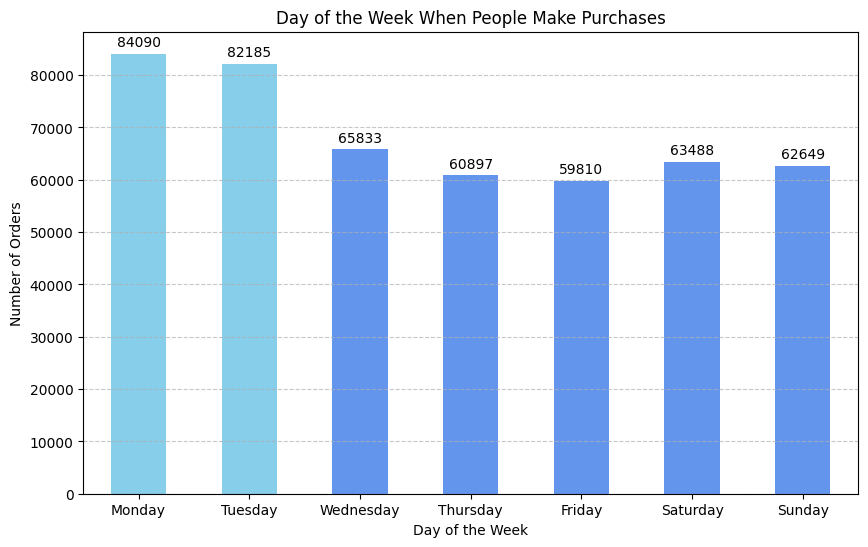

In [41]:
# Create the chart
plt.figure(figsize=(10, 6))

# Custom colors to highlight the days with the most orders
colors = ['cornflowerblue' if day not in [0, 1] else 'skyblue' for day in instacart_orders_df['order_dow'].value_counts().sort_index().index]

# Plot the bars with custom colors
bars = instacart_orders_df['order_dow'].value_counts().sort_index().plot(kind='bar', color=colors)

# Title and labels
plt.title('Day of the Week When People Make Purchases')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Add labels above the bars with exact values
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center', size=10, xytext=(0, 8),
                  textcoords='offset points')

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.show()


#### Findings

- `Monday and Tuesday are the most active days`: Users prefer to do their shopping at the beginning of the week, with Monday being the day with the highest number of orders, closely followed by Tuesday.

- `High activity on weekends`: Although not as high as Monday and Tuesday, Saturday and Sunday also show significant shopping volume, indicating that people prefer to stock up for the weekend.

- `Wednesday and Friday are the least active days`: These days reflect a lower number of purchases, which may be related to consumers' mid-week and end-of-week routines.


### **Time Between Orders**

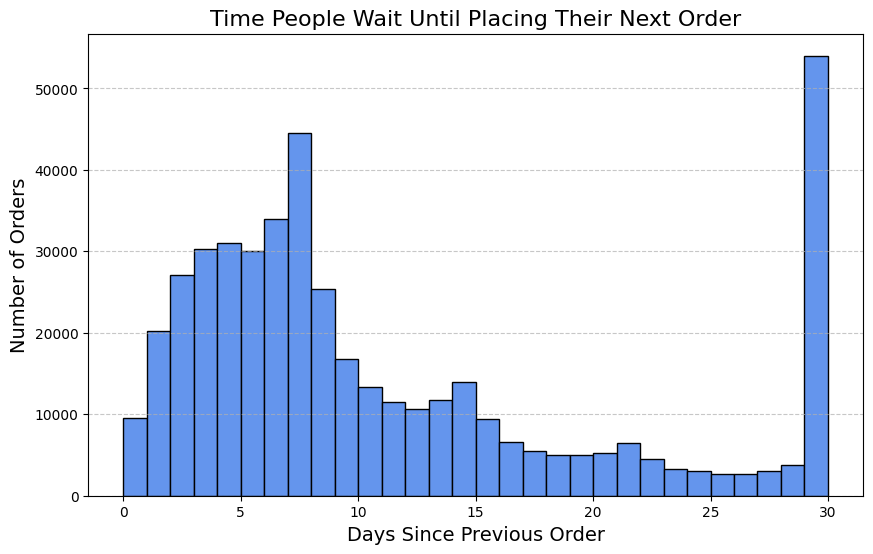

In [42]:
# Create the histogram chart
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(instacart_orders_df['days_since_prior_order'], bins=30, color='cornflowerblue', edgecolor='black')

plt.title('Time People Wait Until Placing Their Next Order', fontsize=16)
plt.xlabel('Days Since Previous Order', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#### Findings

- The chart shows the time people wait before placing their next order. Two important peaks can be observed:

`The first peak occurs around day 7`: This suggests that a large portion of users tends to place orders weekly, likely as part of their shopping routines.

`The second significant peak is on day 30`: This indicates that many users place orders on a monthly basis, which could be related to their payment cycle or larger monthly purchases.

`Additionally, users who order more frequently seem to do so between days 1 and 15.` The decrease between day 16 and day 29 suggests that fewer users tend to wait more than two weeks to place another order.

### **Difference Between Wednesday and Saturday for 'order_hour_of_day'**

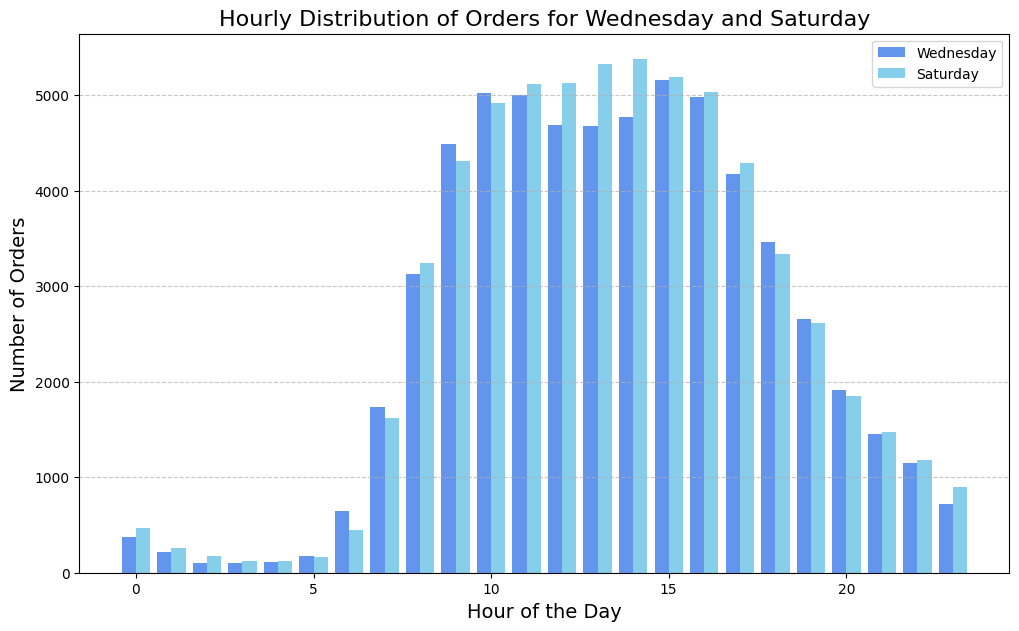

In [43]:
# Filter Wednesday and Saturday data
wednesday_orders = instacart_orders_df[instacart_orders_df['order_dow'] == 3]
saturday_orders = instacart_orders_df[instacart_orders_df['order_dow'] == 6]

wednesday_hour_counts = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_hour_counts = saturday_orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 7))

# Plot stacked bars
bar_width = 0.4
bars_wed = plt.bar(wednesday_hour_counts.index - bar_width/2, wednesday_hour_counts, 
                   width=bar_width, color='cornflowerblue', label='Wednesday')
bars_sat = plt.bar(saturday_hour_counts.index + bar_width/2, saturday_hour_counts, 
                   width=bar_width, color='skyblue', label='Saturday')

# Title and labels
plt.title('Hourly Distribution of Orders for Wednesday and Saturday', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.legend()

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Findings

Differences in Orders Between Wednesday and Saturday

- `Higher number of orders on Saturday`: Although both days have similar patterns, Saturdays generally have a higher volume of orders during almost all hours of the day compared to Wednesdays.

- `Activity peaks`: A similar pattern of activity peaks is observed between 10:00 a.m. and 2:00 p.m., suggesting that these hours are preferred by customers for making purchases on both days.

- `More even distribution on Wednesday`: While Saturdays have more concentrated peaks in the late morning, Wednesdays show a more even distribution of orders throughout the day.

### **Distribution of the Number of Orders per Customer**

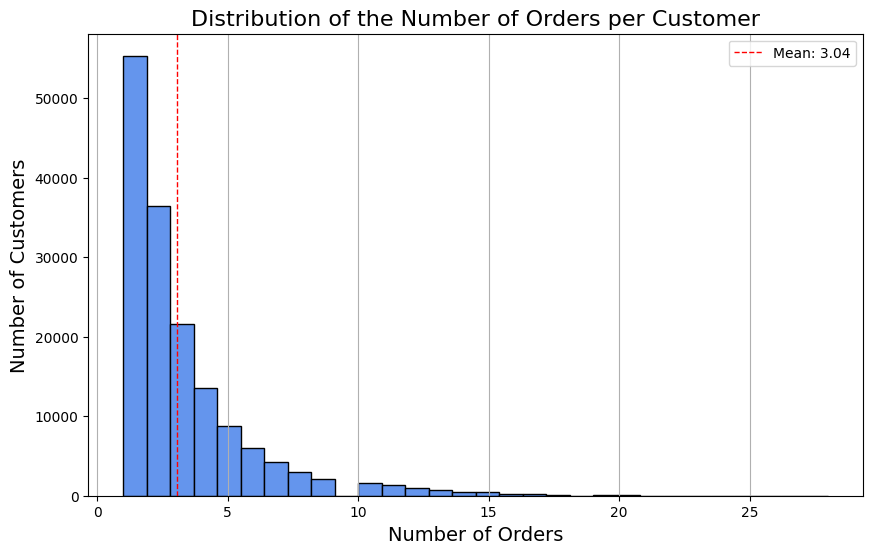

In [45]:
# Distribution of the Number of Orders per Customer
orders_per_user = instacart_orders_df.groupby('user_id')['order_id'].count()

plt.figure(figsize=(10, 6))

# Change the number of bins for clearer visualization
orders_per_user.hist(bins=30, color='cornflowerblue', edgecolor='black')

# Title and labels
plt.title('Distribution of the Number of Orders per Customer', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

# Mean line
mean_orders = orders_per_user.mean()
plt.axvline(mean_orders, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_orders:.2f}')

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legend
plt.legend()

plt.show()


#### Findings

- `Skewed distribution`: Most customers place between 1 and 5 orders. There is a steep drop as the number of orders per customer increases, suggesting that only a minority of users place more than 10 orders.

- `Few users with many orders`: While most customers have a low number of orders, there is a small number of users who place significantly more, with some reaching up to 20-25 orders.

- `Average number of orders`: A line indicating the average number of orders per customer was added, providing an additional reference to understand the overall behavior of the user base.


### **Most Popular Products**

In [34]:
# Count the most sold products and select the top 20
top_products = order_products_df['product_id'].value_counts().head(20)

# Start a list to store the product names
top_products_names = []

# Iterate over the most sold product IDs to get their names
for product_id in top_products.index:
    # Buscamos el nombre del producto en el DataFrame de productos utilizando el product_id.
    product_name = products_df[products_df['product_id'] == product_id]['product_name'].values[0]
    top_products_names.append(product_name)

# Create a DataFrame with the product ID, product name, and sales frequency
top_products_df = pd.DataFrame({'product_id': top_products.index, 'product_name': top_products_names, 'frequency': top_products.values})

# Print the resulting DataFrame with the most popular products
print(top_products_df)


    product_id              product_name  frequency
0        24852                    Banana      66050
1        13176    Bag of Organic Bananas      53297
2        21137      Organic Strawberries      37039
3        21903      Organic Baby Spinach      33971
4        47209      Organic Hass Avocado      29773
5        47766           Organic Avocado      24689
6        47626               Large Lemon      21495
7        16797              Strawberries      20018
8        26209                     Limes      19690
9        27845        Organic Whole Milk      19600
10       27966       Organic Raspberries      19197
11       22935      Organic Yellow Onion      15898
12       24964            Organic Garlic      15292
13       45007          Organic Zucchini      14584
14       39275       Organic Blueberries      13879
15       49683            Cucumber Kirby      13675
16       28204        Organic Fuji Apple      12544
17        5876             Organic Lemon      12232
18        82

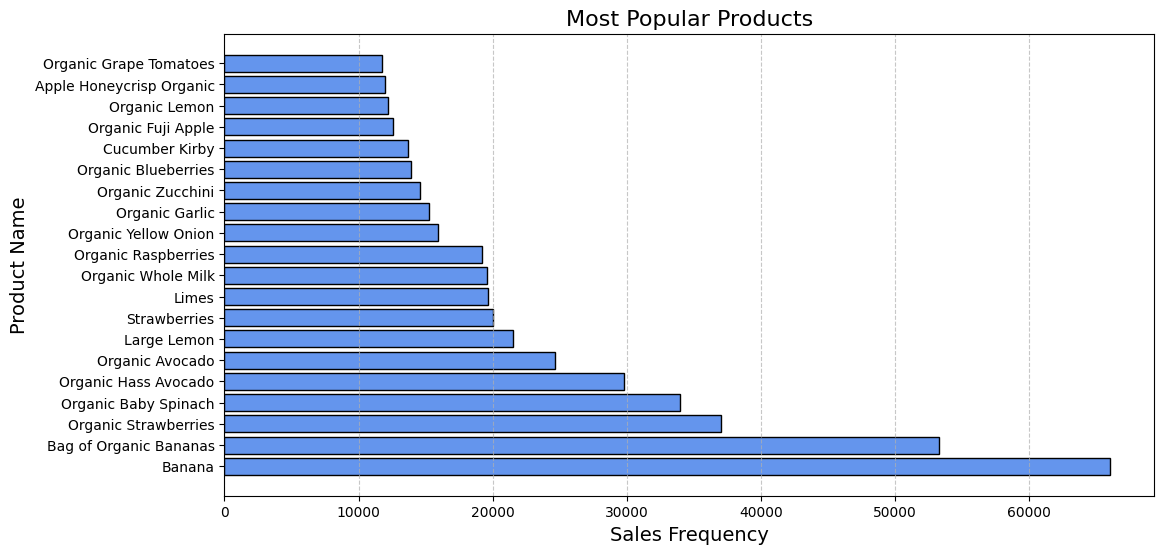

In [46]:
# Create a bar chart for the most popular products
plt.figure(figsize=(12, 6))
plt.barh(top_products_df['product_name'], top_products_df['frequency'], color='cornflowerblue', edgecolor='black')
plt.title('Most Popular Products', fontsize=16)
plt.xlabel('Sales Frequency', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the chart
plt.show()


#### Findings

`Most Popular Products`:

- The most requested products are mainly fresh fruits and vegetables.

- `Banana`, `Bag of Organic Bananas`, and `Organic Strawberries` stand out the most.

`Trend Toward Healthy Options`:

- The list includes organic products like `Organic Baby Spinach` and `Organic Hass Avocado`, reflecting a preference for healthy foods.

`Consumption Patterns`:

- The high demand for fresh products indicates a health-oriented lifestyle among Instacart consumers.

`Business Implications`:

- This allows for better inventory planning for high-turnover products.

- Opportunities for marketing campaigns centered on fresh and organic products.

#### Recommendations

`Increase Stock`: Ensure sufficient inventory of fresh and organic products.

`Marketing Campaigns`: Develop promotions focused on healthy options.

`Customer Satisfaction Surveys`: Collect customer feedback to adjust the product offering.

#### Conclusions

- The findings highlight the importance of fresh fruits and vegetables in shopping behavior, suggesting that Instacart should optimize its product offering and marketing to align with these health trends.

### **Proportion of Reordered Products**

       product_id  proportion
0               1    0.564286
2               3    0.738095
3               4    0.510204
4               7    0.500000
5               8    0.315789
...           ...         ...
45568       49690    0.800000
45569       49691    0.430556
45570       49692    0.416667
45571       49693    0.440000
45572       49694    0.333333

[28849 rows x 2 columns]


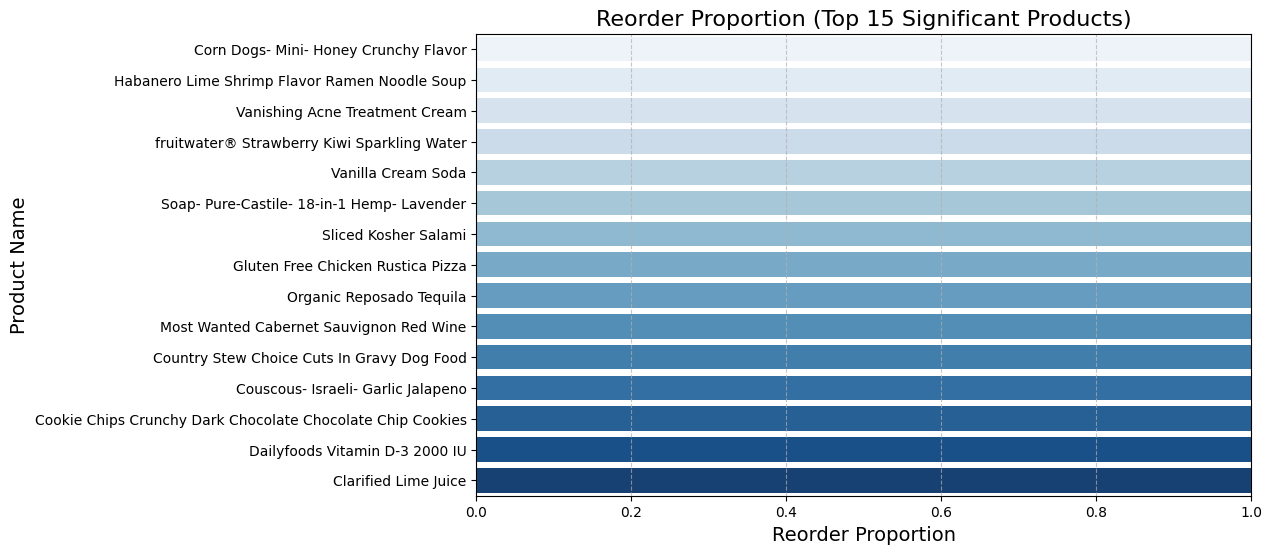

In [38]:
# Calculate the reorder proportion per product
proportion_reordered_per_product_df = order_products_df.groupby('product_id')['reordered'].mean().reset_index()

# Rename the column for clarity
proportion_reordered_per_product_df.columns = ['product_id', 'proportion']

# Filter for significant products (proportions > 0.3)
significant_products = proportion_reordered_per_product_df[proportion_reordered_per_product_df['proportion'] > 0.3]

# Verify the filtered data
print(significant_products)

# Filter to show the top 15 products with the highest proportion
top_significant_products = significant_products.nlargest(15, 'proportion')

# Merge with product names
top_significant_products = top_significant_products.merge(products_df[['product_id', 'product_name']], on='product_id')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='proportion', y='product_name', data=top_significant_products, palette='Blues')
plt.title('Reorder Proportion (Top 15 Significant Products)', fontsize=16)
plt.xlabel('Reorder Proportion', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#### Findings

`Reorder Proportions`:

- Many products have reorder proportions below 0.5, suggesting they are not considered essential by consumers.

- Products with a reorder proportion of 1.0 indicate high loyalty and repeated purchases.

`Key Product Identification`:

- Products like `"Clarified Lime Juice"` and `"Dailyfoods Vitamin D-3 2000 IU"` are frequently reordered, suggesting they are essential to consumers.

`Consumer Trends`:

- Consumers tend to reorder specific products, which may indicate clear preferences in their purchasing decisions.

#### Recommendations

`Marketing Strategy`:

- Develop promotional campaigns focused on products with high reorder rates to incentivize purchases.

`Continuous Analysis`:

- Regularly track the reorder proportion to identify trends and adjust inventory strategies.

`Inventory Optimization`:

- Ensure constant availability of products with high reorder rates to meet customer demand.

#### Conclusions

- The visualization and analysis of product reorder proportions reveal clear patterns in consumer behavior.

- Using this information strategically can improve customer satisfaction and encourage product loyalty.

- Implementing the proposed recommendations will allow the company to optimize resources and maximize sales opportunities.


### **Products Added First to the Cart**

    product_id  frequency                 product_name
0        24852      15562                       Banana
1        13176      11026       Bag of Organic Bananas
2        27845       4363           Organic Whole Milk
3        21137       3946         Organic Strawberries
4        47209       3390         Organic Hass Avocado
5        21903       3336         Organic Baby Spinach
6        47766       3044              Organic Avocado
7        19660       2336                 Spring Water
8        16797       2308                 Strawberries
9        27966       2024          Organic Raspberries
10       44632       1914   Sparkling Water Grapefruit
11       49235       1797          Organic Half & Half
12       47626       1737                  Large Lemon
13         196       1733                         Soda
14       38689       1397     Organic Reduced Fat Milk
15       26209       1370                        Limes
16       12341       1340                Hass Avocados
17        

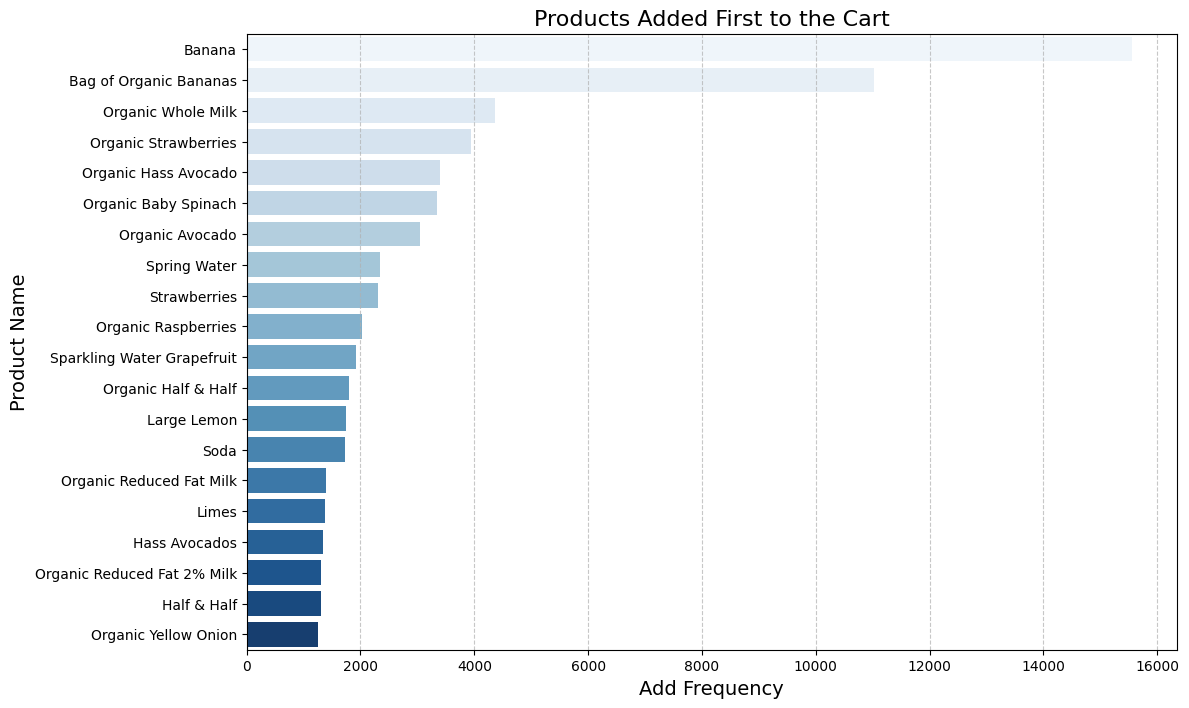

In [39]:
# Filter products that are added first to the cart (add_to_cart_order == 1)
top_first_cart_items = order_products_df[order_products_df['add_to_cart_order'] == 1]['product_id'].value_counts().head(20)

# Create a DataFrame to store product information
top_first_cart_items_info = pd.DataFrame({
    'product_id': top_first_cart_items.index,
    'frequency': top_first_cart_items.values
})

# Merge the DataFrame with product names
top_first_cart_items_info = pd.merge(top_first_cart_items_info, products_df[['product_id', 'product_name']], on='product_id', how='left')

# Print the resulting DataFrame showing the most frequently added products to the cart
print(top_first_cart_items_info)

# Plot the products added first to the cart
plt.figure(figsize=(12, 8))
sns.barplot(x='frequency', y='product_name', data=top_first_cart_items_info, palette='Blues')
plt.title('Products Added First to the Cart', fontsize=16)
plt.xlabel('Add Frequency', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Findings

`Most Added Products`:

- The products most frequently added first to the cart are primarily fruits and dairy items. 
`Banana`, `Bag of Organic Bananas`, and `Organic Whole Milk` are among the most added.

`Shopping Behavior Trends`:

- The prominence of fresh and organic products suggests that consumers tend to prioritize these items when making their purchases.

`Product Diversity`:

- The list includes a variety of products, from fruits to beverages, reflecting different categories that attract consumers.

`Sales Opportunities`:

- Products like Organic Baby Spinach and Organic Hass Avocado indicate a growing interest in healthy options among consumers.

#### Recommendations

`Inventory Optimization`:

- Ensure sufficient stock of products that are frequently added first to the cart to meet consumer demand.

`Targeted Marketing`:

- Implement marketing campaigns that highlight these products to capture consumers' attention at the beginning of their shopping experience.

`Fresh Product Promotions`:

- Offering discounts or promotions for products frequently added to the cart could encourage more purchases.

#### Conclusions

- The findings suggest that Instacart consumers have a strong preference for fresh and organic products when shopping. This presents an opportunity for Instacart to optimize its inventory and develop marketing strategies focused on these products, improving customer experience and potentially increasing sales.

## **Final Conclusion**

This Instacart data analysis offers a detailed understanding of customer shopping habits and online consumption patterns, highlighting several key trends:

`Hourly and Daily Preferences`: Most orders are concentrated between 10 a.m. and 3 p.m., with peak activity on Mondays and Tuesdays. This indicates that consumers tend to make purchases at the beginning of the week and during morning hours.

`Time Between Orders`: Many customers shop weekly, with spikes in monthly orders. This suggests the need for marketing strategies that consider users' purchasing frequency.

`Popular and Reordered Products`: The most requested products are primarily fresh fruits and vegetables, reflecting a preference for healthy options. The high reorder rate of certain items indicates customer loyalty, offering opportunities to personalize offers.

`Cart Addition Behavior`: The products added first to the cart are mostly fresh and organic, indicating that these items are essential in consumers' shopping planning.

`Strategic Recommendations`: It is suggested that Instacart implement marketing strategies focused on popular and high-turnover products. Enhancing customer experience during peak hours and busy days can increase satisfaction and foster long-term loyalty.

In conclusion, this project not only highlights the current behaviors of Instacart consumers but also provides a framework for strategic decisions that will optimize the platform's operation and improve the customer experience.